# KMeans Clustering

## Importing Libraries

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Get Data

### Call Kaggle

In [3]:
!kaggle datasets list

ref                                                         title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                         Online Food Dataset                              3KB  2024-03-02 18:50:30          21727        439  0.9411765        
sukhmandeepsinghbrar/housing-price-dataset                  Housing Price Dataset                          780KB  2024-04-04 19:45:43            823         23  1.0              
datascientist97/e-commerece-sales-data-2024                 E-commerece Sales Data 2024                      6MB  2024-04-05 12:32:58            607         23  1.0              
mohdshahnawazaadil/restaurant-dataset                       Restaurant Dataset                           

In [4]:
!kaggle datasets download -d anmolkumar/health-insurance-cross-sell-prediction

Dataset URL: https://www.kaggle.com/datasets/anmolkumar/health-insurance-cross-sell-prediction
License(s): GPL-2.0




  0%|          | 0.00/6.47M [00:00<?, ?B/s]
 15%|█▌        | 1.00M/6.47M [00:00<00:01, 2.93MB/s]
 46%|████▋     | 3.00M/6.47M [00:00<00:00, 6.10MB/s]
 93%|█████████▎| 6.00M/6.47M [00:00<00:00, 11.0MB/s]
100%|██████████| 6.47M/6.47M [00:00<00:00, 9.11MB/s]


In [5]:
import zipfile

with zipfile.ZipFile("health-insurance-cross-sell-prediction.zip", "r") as zip_ref:
    zip_ref.extractall()

## Read Dataset



Data Description

Variable Definition

- **id** Unique ID for the customer
- **Gender** Gender of the customer
- **Age** Age of the customer
- **Driving_License** **0** : Customer does not have DL, 1 : Customer already has DL
- **Region_Code** Unique code for the region of the customer
- **Previously_Insured** **1** : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance
- **Vehicle_Age** Age of the Vehicle
- **Vehicle_Damage** **1** : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
- **Annual_Premium** The amount customer needs to pay as premium in the year
- **Policy_Sales_Channel** Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person,etc.
- **Vintage** Number of Days, Customer has been associated with the company Response 1 : Customer is interested, 0 : Customer is not interested



In [6]:
health_data = pd.read_csv("train.csv")

In [7]:
health_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [8]:
health_data.shape

(381109, 12)

In [9]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
health_data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Exploratory Data Analysis

In [11]:
health_data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [12]:
for col in health_data.columns:
  print(f"{col}: {health_data[col].nunique()}")

id: 381109
Gender: 2
Age: 66
Driving_License: 2
Region_Code: 53
Previously_Insured: 2
Vehicle_Age: 3
Vehicle_Damage: 2
Annual_Premium: 48838
Policy_Sales_Channel: 155
Vintage: 290
Response: 2


## Prepare Data

### Encoding

In [13]:
# create a for loop to label encode columns with object data type
for col in health_data.columns:
  if health_data[col].dtype == 'object':
    health_data[col] = health_data[col].astype('category')
    health_data[col] = health_data[col].cat.codes

In [14]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  int8   
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  int8   
 7   Vehicle_Damage        381109 non-null  int8   
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), int8(3)
memory usage: 27.3 MB


In [15]:
health_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


## Model Training

### Identify our Feature

In [16]:
X = health_data.drop('Response', axis=1)

### KMeans Cluster Creation

In [17]:
from sklearn.cluster import KMeans

In [32]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [33]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [20]:
kmeans.cluster_centers_

array([[9.54975001e+04, 5.40205451e-01, 3.88034546e+01, 9.97895222e-01,
        2.63985099e+01, 4.56407008e-01, 5.17100014e-01, 5.05932124e-01,
        3.05345061e+04, 1.12091029e+02, 1.54442469e+02],
       [2.86052000e+05, 5.41319728e-01, 3.88418010e+01, 9.97843411e-01,
        2.63790600e+01, 4.60021566e-01, 5.15672093e-01, 5.03816111e-01,
        3.05944112e+04, 1.11977298e+02, 1.54251884e+02]])

- Returns the **centers**

Notice number of dimensions -- exactly as you had your features in your dataset

In [21]:
len(kmeans.cluster_centers_)

2

In [22]:
kmeans.cluster_centers_.shape

(2, 11)

In [23]:
# look at distribution of cluster labels
pd.Series(kmeans.labels_).value_counts()

0    190775
1    190334
Name: count, dtype: int64

### Elbow Method

In [24]:
no_of_clusters = range(2, 15)

inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for :", f, "Clusters is:", u)

The inertia for : 2 Clusters is: 1266135174782377.5
The inertia for : 3 Clusters is: 625487761979781.8
The inertia for : 4 Clusters is: 401264294313023.94
The inertia for : 5 Clusters is: 297503586058929.8
The inertia for : 6 Clusters is: 241138234950493.6
The inertia for : 7 Clusters is: 207168759677261.16
The inertia for : 8 Clusters is: 185121492446411.7
The inertia for : 9 Clusters is: 169895222781826.5
The inertia for : 10 Clusters is: 159139326902518.22
The inertia for : 11 Clusters is: 153351580996305.75
The inertia for : 12 Clusters is: 144252515374746.34
The inertia for : 13 Clusters is: 135237450391090.72
The inertia for : 14 Clusters is: 126331748612487.5


In [37]:
min(inertia)

126331748612487.5

Text(0.5, 1.0, 'Inertia Plot per k')

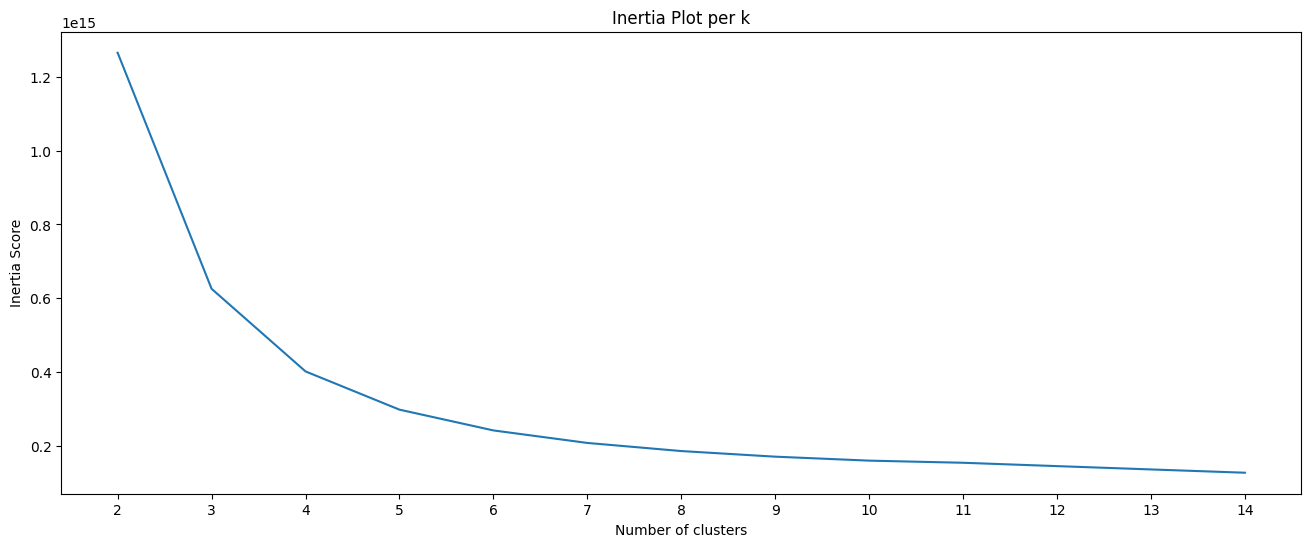

In [25]:
#import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1, figsize=(16,6))
# length = np.arange(len(no_of_clusters))
ax1.plot(no_of_clusters, inertia)
ax1.set_xticks(no_of_clusters)
ax1.set_xticklabels(no_of_clusters)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

In [42]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [43]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

In [44]:
from sklearn.metrics import accuracy_score, r2_score, classification_report

In [45]:
print(accuracy_score(health_data["Response"], kmeans.labels_))

0.5003686609342733


In [46]:
print(classification_report(health_data["Response"], kmeans.labels_))

              precision    recall  f1-score   support

           0       0.88      0.50      0.64    334399
           1       0.12      0.50      0.20     46710

    accuracy                           0.50    381109
   macro avg       0.50      0.50      0.42    381109
weighted avg       0.78      0.50      0.58    381109

